# Exercises in statistics

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("energySoftware.csv")
df.sample(frac=0.2)

,test,PKG,CPU,nn,nn2,time
690,bubblesort_ll2,0.024048,0.017883,,,3.658
1151,bubblesort_ll2,0.017883,0.015686,,,3.567
1034,bubblesort_ll2,0.018188,0.017273,,,3.494
816,bubblesort_ll,0.013245,0.013489,,,2.379
646,bubblesort_func,0.018066,0.016785,,,3.376
...,...,...,...,...,...,...
1004,bubblesort_func,0.024536,0.017212,,,3.456
11,bubblesort,0.010193,0.009644,,,2.591
904,bubblesort_ll2,0.017029,0.017029,,,3.608
632,bubblesort_func,0.018921,0.017456,,,3.490


<h3>Exploring the data</h>

In [5]:
from IPython.display import display

display(df.describe())
print("\n" + "-"*50 + "\n")

print("DataFrame Info")
df.info()
print( "-"*50 )

print("Is anything null?")
print(df.isnull().sum())


,PKG,CPU,time
count,1441.000000,1441.000000,1441.000000
mean,0.017618,0.015021,3.009384
std,0.004464,0.003192,0.571439
min,0.008179,0.007812,1.962000
25%,0.013733,0.012939,2.462000
50%,0.017761,0.015747,3.363000
75%,0.020874,0.017822,3.524000
max,0.026794,0.020325,4.244000



--------------------------------------------------

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    1441 non-null   object 
 1   PKG     1441 non-null   float64
 2   CPU     1441 non-null   float64
 3   nn      1441 non-null   object 
 4   nn2     1441 non-null   object 
 5   time    1441 non-null   float64
dtypes: float64(3), object(3)
memory usage: 67.7+ KB
--------------------------------------------------
Is anything null?
test    0
PKG     0
CPU     0
nn      0
nn2     0
time    0
dtype: int64


In [6]:
print("Shape:\n", df.shape,"\n")

print("Columns and types:")
print(df.dtypes,"\n")
# Checking this column for unique values since it has categorical data
print("Unique test types:\n", df['test'].unique())

Shape:
 (1441, 6) 

Columns and types:
test     object
PKG     float64
CPU     float64
nn       object
nn2      object
time    float64
dtype: object 

Unique test types:
 ['bubblesort' 'bubblesort_func' 'bubblesort_ll2' 'bubblesort_ll']


<hr>

<h1> 1. Plot the distribution of CPU for each test type </1>




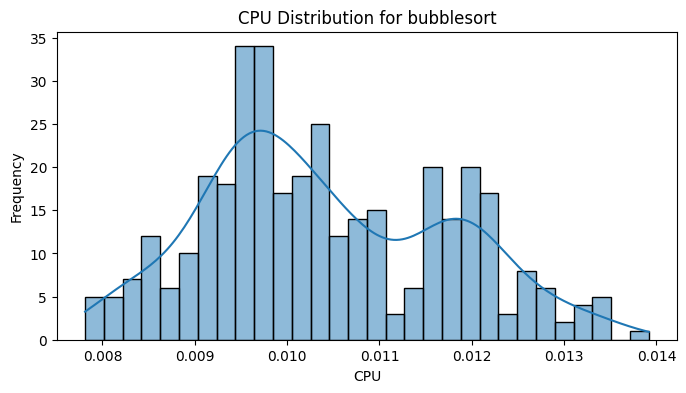

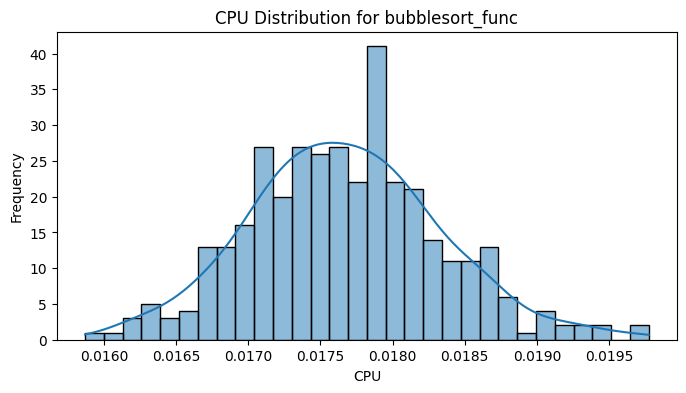

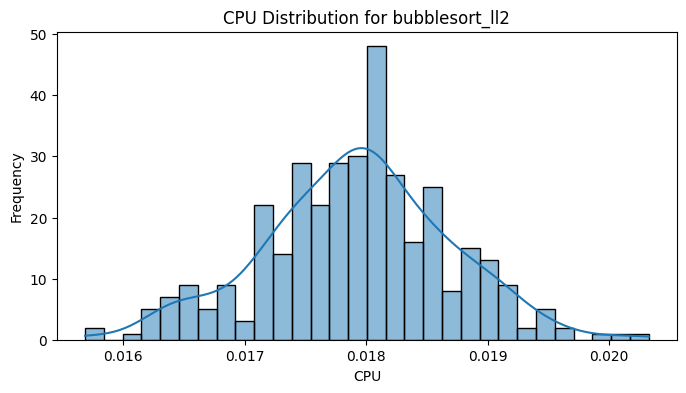

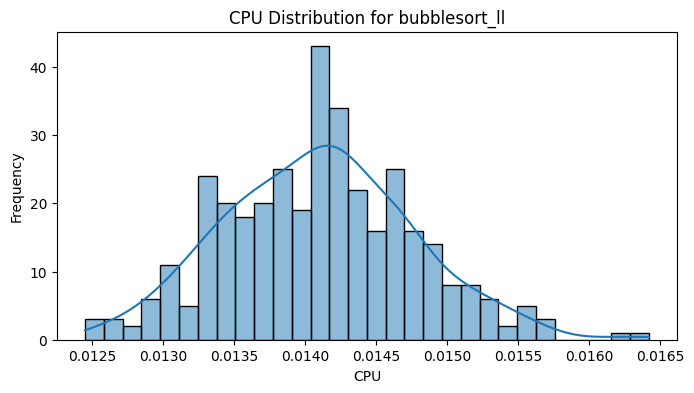

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Since there only are 4 different inique test types 
# and we need to plot CPU distribution foreach.
# We loop through and create a histogram for testType.
testTypeArray = df['test'].unique()

for testType in testTypeArray:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[df['test'] == testType]['CPU'], bins = 30, kde=True)
    plt.title(f'CPU Distribution for {testType}')
    plt.xlabel('CPU')
    plt.ylabel('Frequency')
    plt.show()

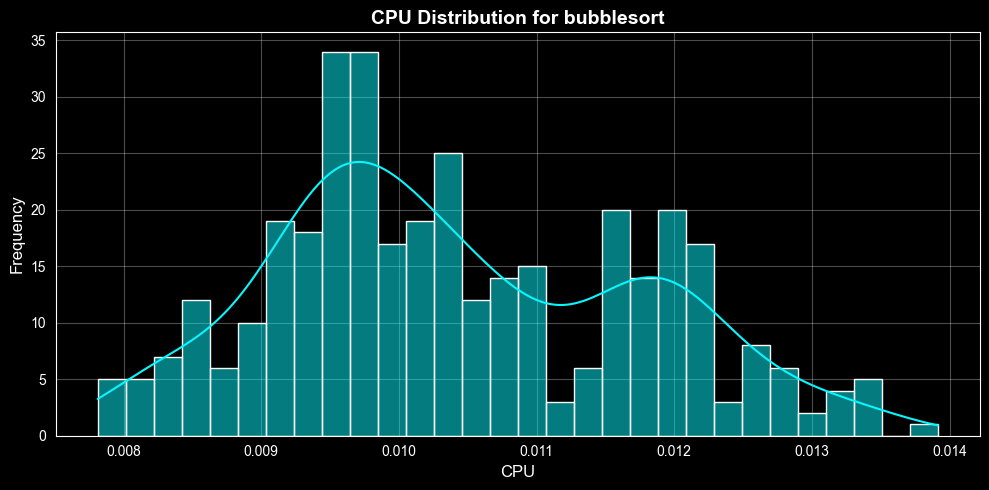

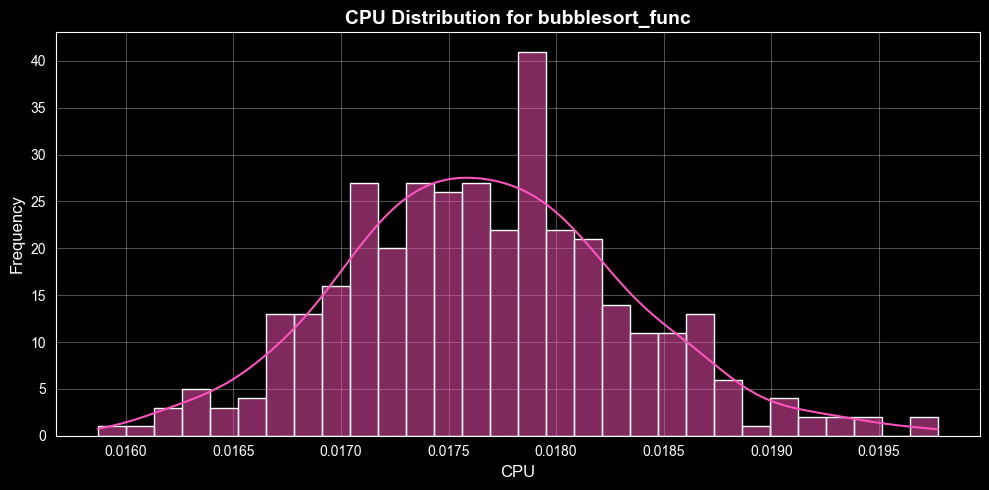

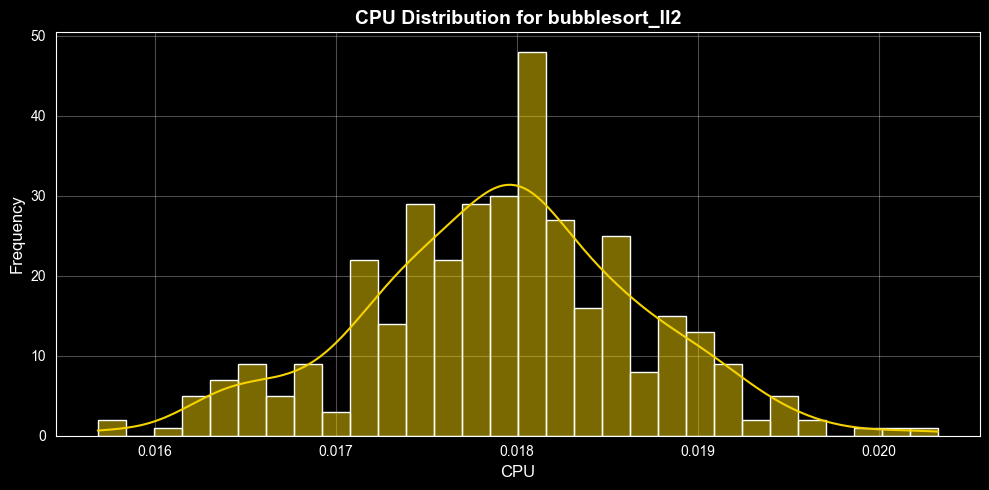

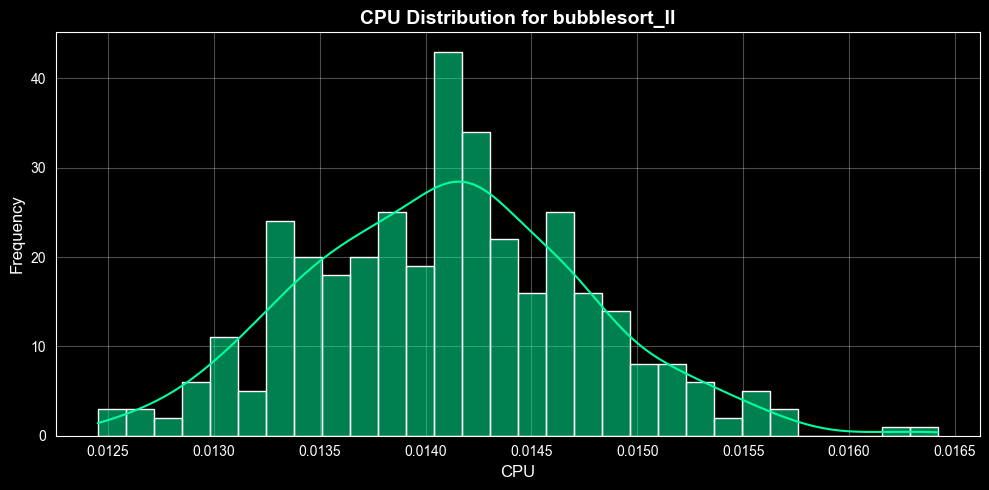

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns


sns.set_style('darkgrid')
plt.style.use('dark_background')
some_colors = ['#08F7FE', '#FE53BB', '#F5D300', '#00ff9f']

# This is the same cell as above, but with some extra styling to try perameters.

testTypeArray = df['test'].unique()
i = 0
for testType in testTypeArray:
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['test'] == testType]['CPU'], bins = 30, kde=True, color=some_colors[i % len(some_colors)], edgecolor='white', linewidth=1)
    plt.title(f'CPU Distribution for {testType}', fontsize=14, color='white', weight='bold')
    plt.xlabel('CPU', fontsize=12, color='white')
    plt.ylabel('Frequency', fontsize=12, color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    i = i + 1

# Reset the style to default for further plots
sns.set_theme()
plt.style.use('default')

<hr><br>
<h1>2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s).</h>


Histogram to compare the distribution between the two groups

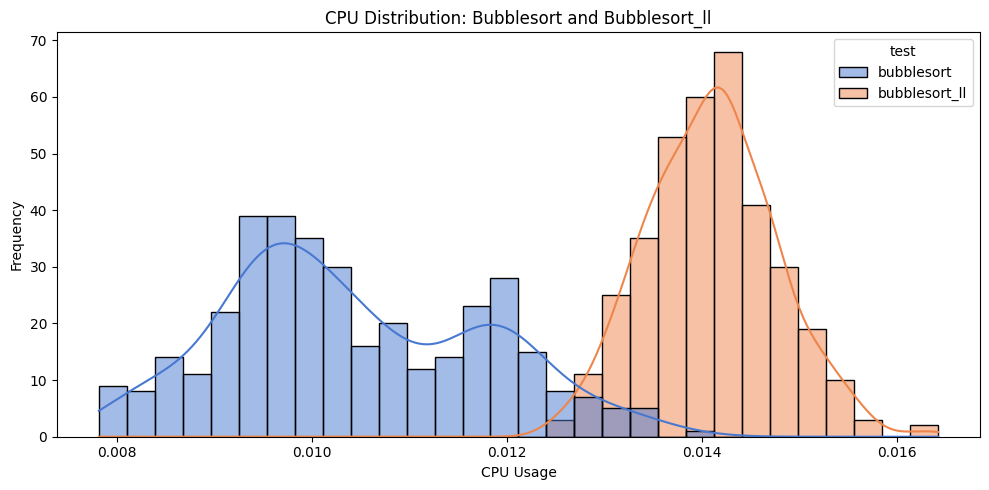

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cpu_bubblesort = df[df['test'] == 'bubblesort']['CPU']
cpu_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['CPU']
df_compare = df[df['test'].isin(['bubblesort', 'bubblesort_ll'])]
                
plt.figure(figsize=(10, 5))
sns.histplot(data=df_compare, x='CPU', hue='test', bins=30, kde=True, palette='muted')

plt.title('CPU Distribution: Bubblesort and Bubblesort_ll')
plt.xlabel('CPU Usage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<hr>
<p>Here we test <code>bubblesort</code> and  <code>bubblesort_ll</code> for normality. 

In [ ]:
from scipy.stats import shapiro

print("Shapiro-Wilk test for bubblesort:")
print(shapiro(cpu_bubblesort), "\n")

print("Shapiro-Wilk test for bubblesort_ll:")
print(shapiro(cpu_bubblesort_ll))

Shapiro-Wilk test for bubblesort:
ShapiroResult(statistic=np.float64(0.97149957608177), pvalue=np.float64(1.5722188157994535e-06)) 

Shapiro-Wilk test for bubblesort_ll:
ShapiroResult(statistic=np.float64(0.9948246948673037), pvalue=np.float64(0.26921286581817916))


<li><b>Buttlesort</b></li> <p><b>P-value</b> below 0.05 = meaning it we <b>accept null-hypothesis</b> and I don't worry about the data being normally distributed </p>
<br>
<li><b>Bubblesort_ll</b></li> <p><b>P-value</b> is greater than 0.05 = <b>reject null-hypothesis</b>, so it's normal. It also looks bell-curved with a negativ skew. </p>

<br>
The results are as expected as <code>bubblesort_ll</code> does look like a bell-curve, while <code>bubblesort</code> does not</p>
<hr>

<p> Here I am testing if the distribution is skewed </p>



In [14]:

cpu_bubblesort = df[df['test'] == 'bubblesort']['CPU']
cpu_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['CPU']

print("Bubblesort CPU mean:", cpu_bubblesort.mean())
print("cpu_bubblesort CPU median/50%", cpu_bubblesort.median()) 
display(cpu_bubblesort.describe())
print("Bubblesort_ll CPU mean:", cpu_bubblesort_ll.mean())
print("cpu_bubblesort_ll CPU median/50%", cpu_bubblesort_ll.median())
display(cpu_bubblesort_ll.describe())

Bubblesort CPU mean: 0.01041198899541205
cpu_bubblesort CPU median/50% 0.0101318359375


count    361.000000
mean       0.010412
std        0.001316
min        0.007812
25%        0.009460
50%        0.010132
75%        0.011597
max        0.013916
Name: CPU, dtype: float64

Bubblesort_ll CPU mean: 0.014096577962239584
cpu_bubblesort_ll CPU median/50% 0.01409912109375


count    360.000000
mean       0.014097
std        0.000662
min        0.012451
25%        0.013611
50%        0.014099
75%        0.014526
max        0.016418
Name: CPU, dtype: float64

<li><b>Buttlesort</b>: Minimal positive skew </li>
<p><b>Mean</b>(0.010412) are greater than <b>median/50%</b>(0.010132) meaning it's positive skew, but it's only very slightly</p>
<br>
<li><b>Bubblesort_ll</b>: Minimal negative skew</li>
<p><b>Mean</b>(0.014097) are greater than <b>median/50%</b>(0.014099) meaning it's positive skew, but it's only very slightly</p>


<hr>
<h4>Choosing test : </h>
<h5>Since <code>bubblesort</code> is tested with Shapiro-Wilk to acceptable null-hypothesis and <code>bubblesort_ll</code> is tested with Shapiro-Wilk to reject null-hypothesis, 
<br><code>bubblesort</code> is non-normal, while <code>bubblesort_ll</code> is normal. Thats our first indicator for which test to choose.
<br>Secondly the two groups are recorded in seperate rows and without any shared ID, so we can conclude it's two independent groups(not paired).
 <br>Whith these two indicators, a suitable test is <b>"Mann-Whitney U"</b>, which compares two independent and non-parametric samples.
</h>

<h3>Mann-Whitney U</h>

In [ ]:
from scipy.stats import mannwhitneyu

cpu_bubblesort = df[df['test'] == 'bubblesort']['CPU']
cpu_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['CPU']

u_statistic, p_value = mannwhitneyu(cpu_bubblesort, cpu_bubblesort_ll)

print(f"Mann-Whitney U Test")
print(f"U statistic: {u_statistic}")
print(f"p-value: {p_value:.4f}")


Mann-Whitney U Test
U statistic: 645.5
p-value: 0.0000


<h3><li>null hypothesis : (<i>There is no difference in CPU between bubblesort and bubblesort_ll</i>)</li></h>
<h3><li>Alternative hypothesis : (<i>There is a difference in CPU usage</i>)</li></h>

<h2>Result :</h>
<h4>The <b>Mann-Whitney</b> U test returned a <b>P value</b> far below the 0.05 significance threshold.
<br>
Therefore it's obvious to reject the <b>null hypothesis</b> and conclude there is a difference in CPU between <code>bubblesort</code> and <code>bubblesort_ll</code></h>
<hr>

<h1>3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?</h>


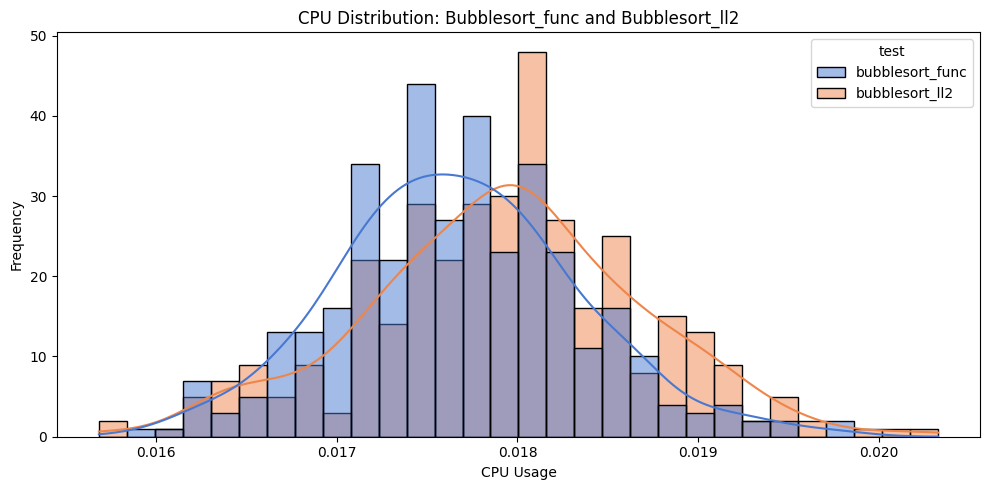

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cpu_bubblesort_func = df[df['test'] == 'bubblesort_func']['CPU']
cpu_bubblesort_ll2 = df[df['test'] == 'bubblesort_ll2']['CPU']
dr_compare = df[df['test'].isin(['bubblesort_func', 'bubblesort_ll2'])]

plt.figure(figsize=(10, 5))
sns.histplot(data=dr_compare, x='CPU', hue='test', bins=30, kde=True, palette='muted')
plt.title('CPU Distribution: Bubblesort_func and Bubblesort_ll2')
plt.xlabel('CPU Usage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats import shapiro

print("Shapiro-Wilk test for bubblesort_func:")
print(shapiro(cpu_bubblesort_func), "\n")

print("Shapiro-Wilk test for bubblesort_ll2:")
print(shapiro(cpu_bubblesort_ll2))

Shapiro-Wilk test for bubblesort_func:
ShapiroResult(statistic=np.float64(0.994501031538344), pvalue=np.float64(0.22397701570892709)) 

Shapiro-Wilk test for bubblesort_ll2:
ShapiroResult(statistic=np.float64(0.9948558743196282), pvalue=np.float64(0.27395759572988476))


<p>Both <code>bubblesort_func</code> and <code>bubblesort_ll2</code> have a <b>P-value</b> above 0.05,
<br> which means it <b>reject null-hypothesis</b> and the both are normally distributed</p>

<hr>
<h4>Choosing test : </h><br><br>

<p>Since data in both groups are numeric, large sample size, the groups are independent and both groups are tested to be normally distributed,
<br>a fitting test would be a parametric test like <b>"t-test"</b></p>


<h3>T-test</h>

In [17]:
from scipy.stats import ttest_ind

cpu_bubblesort_func = df[df['test'] == 'bubblesort_func']['CPU']
cpu_bubblesort_ll2 = df[df['test'] == 'bubblesort_ll2']['CPU']

t_stat, p_value = ttest_ind(cpu_bubblesort_func, cpu_bubblesort_ll2)

print(f"T-test")
print(f"T-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

T-test
T-statistic: -4.6923
p-value: 0.0000


<p>Since the <b>p-value</b> is below 0.05, I reject the <b>null hypothesis</b> and conclude there is a stastistically significant difference in CPU usage between the groups</p>

<h4>How big is the difference?</h>

In [19]:
mean_func = cpu_bubblesort_func.mean()
mean_ll2 = cpu_bubblesort_ll2.mean()
difference = abs(mean_func - mean_ll2)
print(f"Mean of bubblesort_func: {mean_func:.4f}")
print(f"Mean of bubblesort_ll2: {mean_ll2:.4f}")
print(f"Difference in means: {difference:.4f}")

Mean of bubblesort_func: 0.0177
Mean of bubblesort_ll2: 0.0179
Difference in means: 0.0003


The magnitude of difference is 0.0003, which is very small

<h2>Result :</h>
<h3> The independent t-test shows a statistically significant difference in CPU usage between <code>bubblesort_func</code> and <code>bubblesort_ll2</code>.
<br> However, the absolute difference is relatively small (0.0003).</h>
<hr>

<h1>4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).</h>


<p>We already know they independent groups, since they're not before/after for the same items.<br>
We also know they are <code>time</code> is numeric since they are <b>float64.</b>
<br> Lets test with <b>Shapiro-Wilk</b> if the data is normally distributed.

In [20]:
from scipy.stats import shapiro

time_bubblesort = df[df['test'] == 'bubblesort']['time']
time_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['time']

print("Shapiro-Wilk test for bubblesort time:", shapiro(time_bubblesort))
print("Shapiro-Wilk test for bubblesort_ll time:", shapiro(time_bubblesort_ll))

Shapiro-Wilk test for bubblesort time: ShapiroResult(statistic=np.float64(0.9174711482830614), pvalue=np.float64(3.5117387717841384e-13))
Shapiro-Wilk test for bubblesort_ll time: ShapiroResult(statistic=np.float64(0.7900392858871499), pvalue=np.float64(3.2014552851553314e-21))


<p>Both <b>p-value:</b> are greater than the 0.005 threshold. Meaning we <b>accept null-hypothesis</b>. The data is non-normal.
<br>For two independent, non-normally distributed groups, <b>Mann-Whitney U</b> is suitable.</p>

In [21]:
from scipy.stats import mannwhitneyu

time_bubblesort = df[df['test'] == 'bubblesort']['time']
time_bubblesort_ll = df[df['test'] == 'bubblesort_ll']['time']

u_statistic, p_value = mannwhitneyu(time_bubblesort, time_bubblesort_ll)

print(f"Mann-Whitney U Test for time")
print(f"U statistic: {u_statistic}")
print(f"p-value: {p_value:.4f}")

Mann-Whitney U Test for time
U statistic: 74960.0
p-value: 0.0004


<h4>Results:</h>
<p> Since the <b>p-value</b> is less than 0.05 I <b>reject the null hypthesis</b>. 
<br> Meaning there is <b>statistically significant difference</b> in execution time bwteen <code>bubblesort</code> and <code>bubblesort_ll</code>

<h1>5. Perform an ANOVA test to test if there is a difference in means across groups for CPU</h>


6. Perform an ANOVA test to test if there is a difference in means across groups for time